# Testing that everything works
This Jupyter notebook is just an extremely simple example to verify that your installation of tensorflow works properly.

If you haven't already installed tensorflow, after having checked if you have a CUDA-compatible GPU, install (preferably with [Anaconda](https://www.anaconda.com/) as it already installs automatically all the cuDNN drivers) tensorflow accordingly. To install the GPU-enabled version run:

```bash
conda install tensorflow-gpu
```

Otherwise if you want the CPU version run:

```bash
conda install tensorflow
```

In [1]:
# Importing tensorflow
import tensorflow as tf

In [2]:
# Importing methods to retrieve and parse some datasets
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

## Data retrieving
Here we retrieve the data, one-hot encode the classes and normalize the values.

In [3]:
# Retrieving and parsing the data (we use MNIST)
num_classes = 10

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test_categorical) = mnist.load_data()

# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test_categorical, num_classes)

# Normalizing the data between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# Retrieving the model object
from tensorflow.keras.models import Sequential
# And the layers object
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Reshape, Input
# And an additional metric to evaluate the model
from tensorflow.keras.metrics import AUC

In [5]:
# Creating and compiling the model
model = Sequential([
    Input(shape=x_train.shape[1:]),
    Reshape((*x_train.shape[1:], 1)),
    Conv2D(16, (10, 10), activation="relu", padding="same"),
    Conv2D(16, (10, 10), padding="same"),
    Activation("relu"),
    MaxPooling2D(),
    Dropout(0.5),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
], name="Simple model for MNIST".replace(" ", "_"))

# Let's train the model using RMSprop
model.compile(
    loss='categorical_crossentropy',
    optimizer="nadam", 
    metrics=['accuracy', AUC(curve="ROC", name="auroc"), AUC(curve="PR", name="auprc")]
)

model.summary()

Model: "Simple_model_for_MNIST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        1616      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        25616     
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)   

In [6]:
# Training the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test),
    shuffle=True,
    verbose=1
).history

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2173 - accuracy: 0.9324 - auroc: 0.9960 - auprc: 0.9809 - val_loss: 0.0529 - val_accuracy: 0.9820 - val_auroc: 0.9997 - val_auprc: 0.9982
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0719 - accuracy: 0.9779 - auroc: 0.9990 - auprc: 0.9963 - val_loss: 0.0469 - val_accuracy: 0.9853 - val_auroc: 0.9997 - val_auprc: 0.9985
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0525 - accuracy: 0.9833 - auroc: 0.9993 - auprc: 0.9975 - val_loss: 0.0297 - val_accuracy: 0.9906 - val_auroc: 0.9998 - val_auprc: 0.9993
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0448 - accuracy: 0.9860 - auroc: 0.9994 - auprc: 0.9980 - val_loss: 0.0288 - val_accuracy: 0.9899 - val_auroc: 0.9997 - val_auprc: 0.9990
Epoch 5/10
60000/60000 [==============================] - 5s 83us

We will use [plot_keras_history](https://github.com/LucaCappelletti94/plot_keras_history) to plot the training history.

If you need to install the package run in your terminal:

```bash
pip install plot_keras_history
```

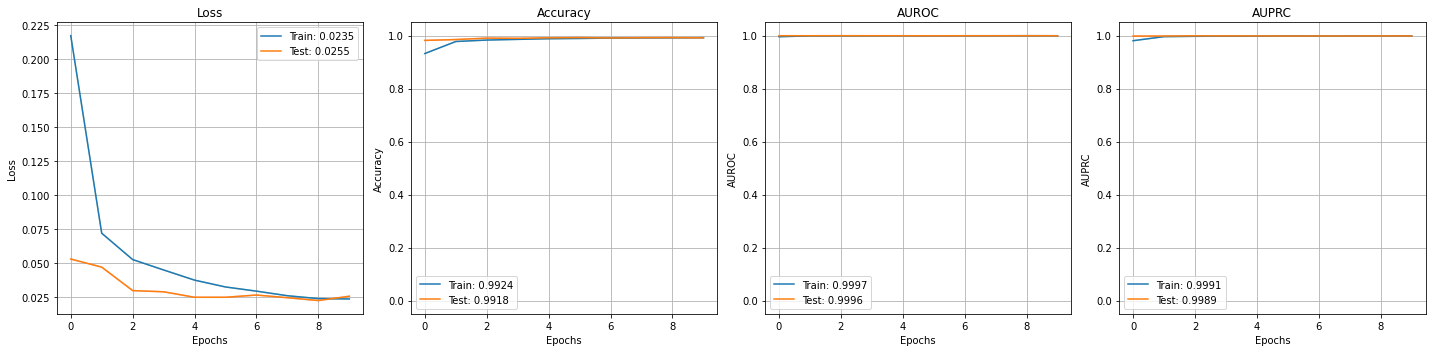

In [7]:
import matplotlib.pyplot as plt
from plot_keras_history import plot_history
plot_history(history)
plt.show()

If you want you can try and beat the [current test accuracy record of MNIST](https://paperswithcode.com/sota/image-classification-on-mnist) which is `99.84`. Buona fortuna!